Initialize h2o and import the dataset

In [1]:
import h2o
h2o.init()
import matplotlib.pyplot as plt
%matplotlib inline

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 23 hours 13 mins
H2O cluster version:,3.13.0.3978
H2O cluster version age:,4 years and 9 days !!!
H2O cluster name:,H2O_started_from_R_Sandipan.Dey_kpl973
H2O cluster total nodes:,1
H2O cluster free memory:,2.510 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [2]:
data= h2o.import_file("http://coursera.h2o.ai/cacao.882.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
#data.summary()
#data.nlevels()

In [4]:
##split data into train, valid and test datasets 
train,valid,test = data.split_frame([.8,.1], seed=69)
##validate the size of dataset (uncommnt to execute)
#print( "%d %d %d" % (train.nrows,valid.nrows, test.nrows  ))

In [5]:
## set the features and response column names, the column Origin
## was removed because of its high cardinality and its redundancy (bean origin),
## the reduced model resulted in a lower error and deviance
## 
y =  'Rating'

xAll = [i for i in train.names if i not in y]
xAll2 =[i for i in train.names if i not in ['Rating', 'Origin']]


In [6]:
## build a deep learning model with default parameters with full reduced feature list(a regression model to predict "Rating")
## run_time 12s

from h2o.estimators.deeplearning import H2ODeepLearningEstimator
m_def = H2ODeepLearningEstimator(model_id = "untuned_model", seed = 69)
%time m_def.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 8.81 s


In [7]:
m_def.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.19803237041288513
RMSE: 0.44500828128573644
MAE: 0.36327013200551606
RMSLE: 0.11078124573783053
Mean Residual Deviance: 0.19803237041288513


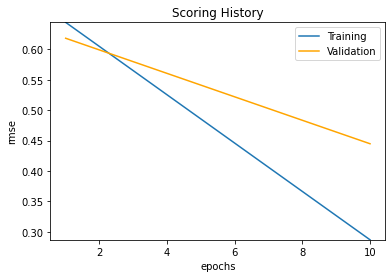

In [8]:
m_def.plot()

In [9]:
## tuned model initalization and training
## for the tuned model the origin feature was deopped because of high cardinality and its redundancy (bean origin)
## run_time 35s
m_def_tuned =H2ODeepLearningEstimator(epochs =25,
                                   stopping_rounds =5,
                                   stopping_tolerance = 0,
                                   stopping_metric = "AUTO",
                                    l1 = 1e-6,
                                    l2 = 1e-6,
                                    hidden = [400,400],
                                    hidden_dropout_ratios = [0.1,0.1],
                                    activation ="RectifierWithDropout",
                                    model_id = "tuned_model", seed = 69)
%time m_def_tuned.train(xAll2, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 27.1 s


In [10]:
m_def_tuned.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.19345577185065752
RMSE: 0.43983607383962664
MAE: 0.3487758542082269
RMSLE: 0.109353702213071
Mean Residual Deviance: 0.19345577185065752


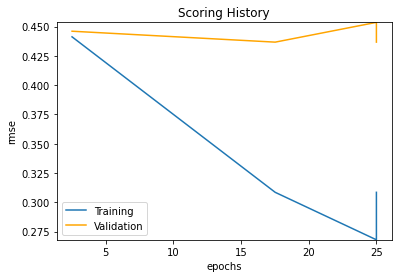

In [11]:
m_def_tuned.plot()

In [12]:
##save models
h2o.save_model(m_def, "c:\h2o_models")
h2o.save_model(m_def_tuned, "c:\h2o_models")

'C:\\h2o_models\\tuned_model'